In [1]:
import cv2
import numpy as np
import os 

In [120]:
img1 = cv2.imread('./background/bg.jpg')
img2 = cv2.imread('./bird/68.png')
img2[img2==255]=0
# 从背景中提取出要替换的区域
rows, cols = img2.shape[:2]
roi = img1[:rows, :cols]

# 创建掩膜
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 0, 255, cv2.THRESH_BINARY_INV)  # >0的像素点，全部变成0，其他变成255( cv2.THRESH_BINARY_INV)

# 保留除logo外的背景
img1_bg = cv2.bitwise_and(roi, roi, mask=mask)  # 按位与
dst = cv2.add(img1_bg, img2)  # 进行融合
img1[:rows, :cols] = dst  # 融合后放在原图上

In [121]:
cv2.imshow('img',img1)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [32]:
mask[mask!=0]

array([220, 220, 220, ..., 220, 220, 220], dtype=uint8)

In [34]:
mask_inv

array([[35, 35, 35, ..., 35, 35, 35],
       [35, 35, 35, ..., 35, 35, 35],
       [35, 35, 35, ..., 35, 35, 35],
       ...,
       [35, 35, 35, ..., 35, 35, 35],
       [35, 35, 35, ..., 35, 35, 35],
       [35, 35, 35, ..., 35, 35, 35]], dtype=uint8)

In [76]:
im = cv2.resize(img1,(0,0),fx=.5,fy=.5)

In [78]:
import xml.etree.ElementTree as ET

In [89]:
#创建根节点
root = ET.Element("annotation")

folder = ET.SubElement(root,"folder")
folder.text = 'results'

filename = ET.SubElement(root,"filename")
filename.text = "jafojfos"

path = ET.SubElement(root,'path')
path.text = 'djkjfkdj'

path = ET.SubElement(root,'path')
path.text = 'jjjjj' 


tree = ET.ElementTree(root)
tree.write("test01.xml")

In [84]:
#创建根节点
root = ET.Element("root")
#创建root的子节点sub1，并添加属性
firstNode = ET.SubElement(root,"sub1")
firstNode.attrib = {"name":"name attribute","age":"age attribute"}
#创建子节点1（sub1）的子节点sub2，并添加数据
secondNode = ET.SubElement(firstNode,"sub2")
secondNode.text = "test"
#创建elementtree对象，写文件
tree = ET.ElementTree(root)
tree.write("test01.xml",encoding="utf-8", method="xml")

In [90]:
def pretty_xml(element, indent, newline, level=0):  # elemnt为传进来的Elment类，参数indent用于缩进，newline用于换行
    if element:  # 判断element是否有子元素    
        if (element.text is None) or element.text.isspace():  # 如果element的text没有内容
            element.text = newline + indent * (level + 1)
        else:
            element.text = newline + indent * (level + 1) + element.text.strip() + newline + indent * (level + 1)
            # else:  # 此处两行如果把注释去掉，Element的text也会另起一行
            # element.text = newline + indent * (level + 1) + element.text.strip() + newline + indent * level
    temp = list(element)  # 将element转成list
    for subelement in temp:
        if temp.index(subelement) < (len(temp) - 1):  # 如果不是list的最后一个元素，说明下一个行是同级别元素的起始，缩进应一致
            subelement.tail = newline + indent * (level + 1)
        else:  # 如果是list的最后一个元素， 说明下一行是母元素的结束，缩进应该少一个    
            subelement.tail = newline + indent * level
        pretty_xml(subelement, indent, newline, level=level + 1)  # 对子元素进行递归操作


tree = ET.parse('test01.xml')  # 解析movies.xml这个文件
root = tree.getroot()  # 得到根元素，Element类
pretty_xml(root, '\t', '\n')  # 执行美化方法
tree.write('output.xml')

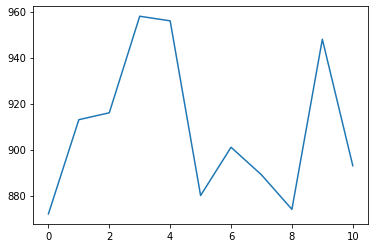

In [125]:
# 实验， 看看random.randint   的分布情况
import matplotlib.pyplot as plt
import random
X=list(range(11))
Y = []
N = []
for i in range(10000):
    Y.append(random.randint(0,10))
Y = np.array(Y)
for n in range(11):
    N.append(len(Y[Y==n]))
sum = 0
for n in N:
    sum+=n
assert sum == 10000
plt.plot(X,N)
#在ipython的交互环境中需要这句话才能显示出来
plt.show()

In [109]:
for i in os.listdir('./bird'):
    print(i)
    img = cv2.imread(os.path.join('./bird',i))
    cv2.imshow('img',img)
    cv2.waitKey(0) 
    cv2.destroyAllWindows()

20.png
22.png
50.png
51.png
68.png


In [230]:
img = cv2.imread('./bird/bird.png', cv2.IMREAD_UNCHANGED)
# img[:,:,:-1][img[:,:,:-1]==255]=0
print(img[0,0,:])
# cv2.imwrite('./bird/test.png',img)
cv2.imshow('img',img)
cv2.waitKey(0) 
cv2.destroyAllWindows()

[255 255 255   0]
